<a href="https://colab.research.google.com/github/ihskas22/Plantify-YOLOv8/blob/main/Plantify_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


# New Section

In [ ]:

!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.4/509.4 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 21.9 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LA6XF6D0fG9te0bgMRws")
project = rf.workspace("pbl-t92do").project("medicinal-and-poisonous-plant-detection")
dataset = project.version(1).download("yolov8")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.74, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Medicinal-and-poisonous-plant-detection-1 in yolov8:: 100%|██████████| 8818/8818 [00:05<00:00, 1728.65it/s]


In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=55 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 193MB/s]
Ultralytics YOLOv8.0.74 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Medicinal-and-poisonous-plant-detection-1/data.yaml, epochs=55, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch21600.jpg
events.out.tfevents.1680971911.3039a000e0df.6414.0  train_batch21601.jpg
F1_curve.png					    train_batch21602.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights


In [ ]:
from PIL import Image
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)



runs/detect/train/confusion_matrix.png


In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

2023-04-08 20:24:43.784117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 20:24:44.929783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.70 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Medicinal-and-poisonous-plant-detection-1/valid/labels.cache... 370 images, 0 backgrounds, 10 corrupt: 100% 370/370 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:08<00:00,  2.81it/s]
                   all        370        558      0.728      0.561      0.595      0.392
 Medicinal-Arive D

In [ ]:

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

2023-04-08 20:26:07.527606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 20:26:08.468327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.70 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/208 /content/Medicinal-and-poisonous-plant-detection-1/test/images/AI-S-011_jpg.rf.ab943a3b81bd04ab353b01505166a4ed.jpg: 640x640 1 Medicinal-Neem, 16.5ms
image 2/208 /content/Medicinal-and-poisonous-plant-detection-1/test/images/AI-S-018_jpg.rf.7b69e03727831e646334937c9302257d.jpg: 640x640 1 Medicinal-Neem, 16.3ms
image 3/208 /content/Medicinal-and-poisonous-plant-detection-1/t

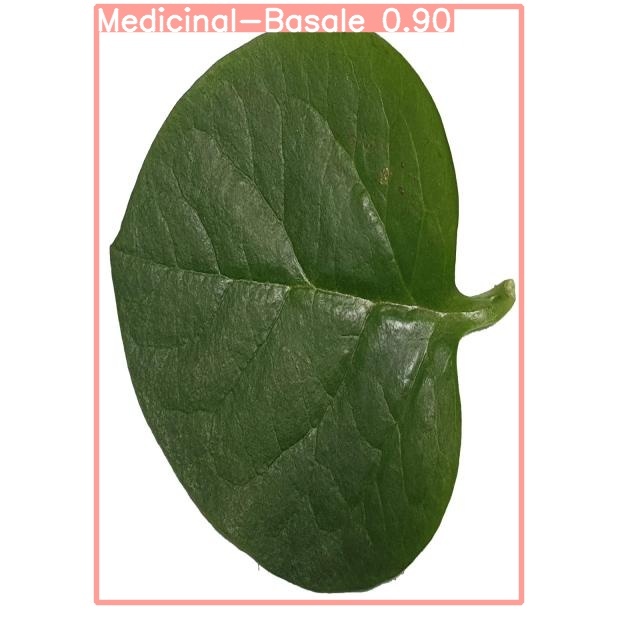

In [ ]:
display(Image(filename='runs/detect/predict/BA-S-071_jpg.rf.67ec2b7447f49ab83c8d2bfdd195cb64.jpg', width=600))


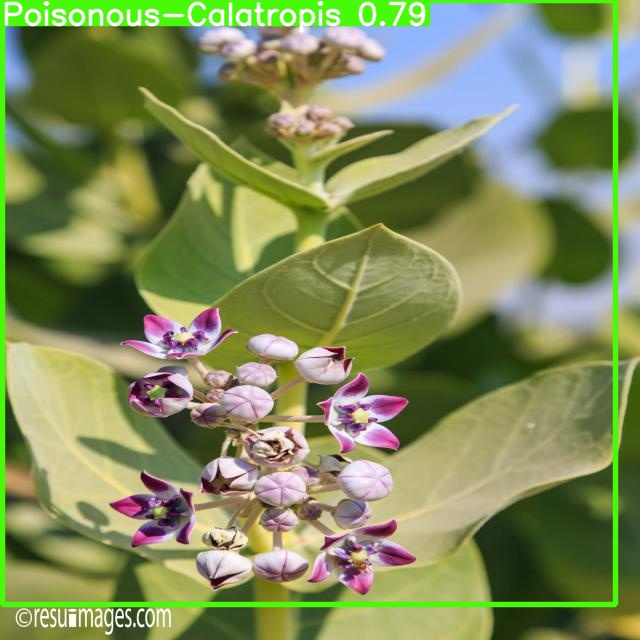

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_102_jpg.rf.38b9213826cfabb944b56c810875b5ae.jpg', width=600))


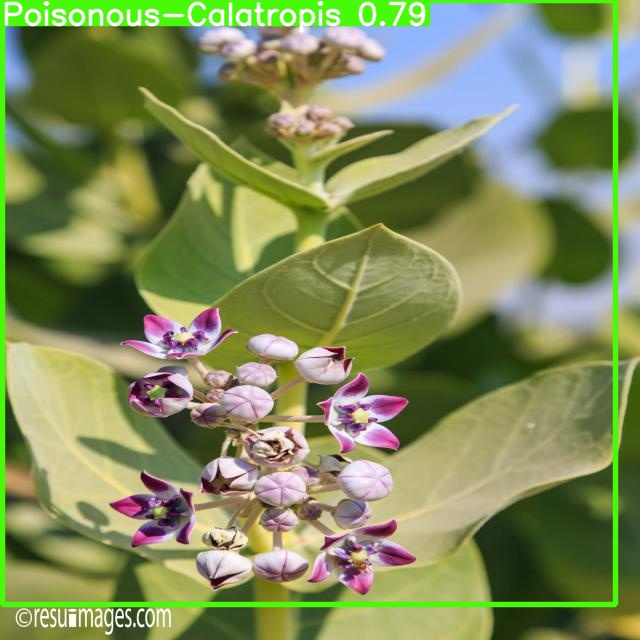

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_102_jpg.rf.38b9213826cfabb944b56c810875b5ae.jpg', width=600))


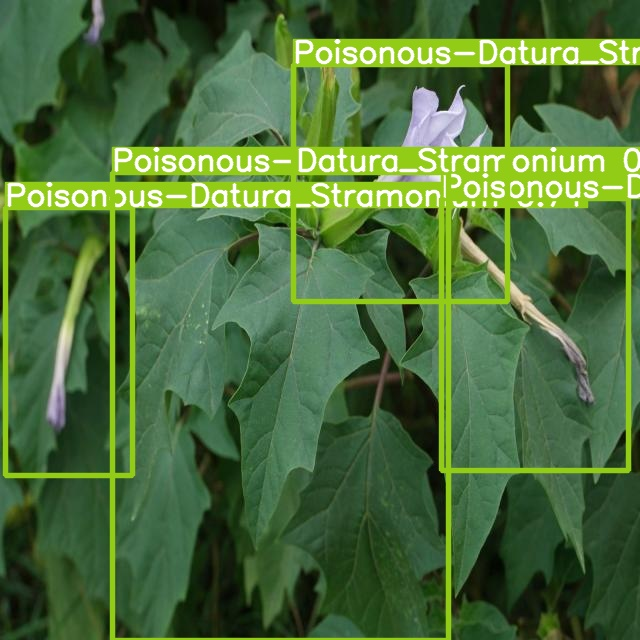

In [ ]:

display(Image(filename='/content/runs/detect/predict/Image_12_jpg.rf.5456ed3d26ff0965437610c1963c7895.jpg', width=600))


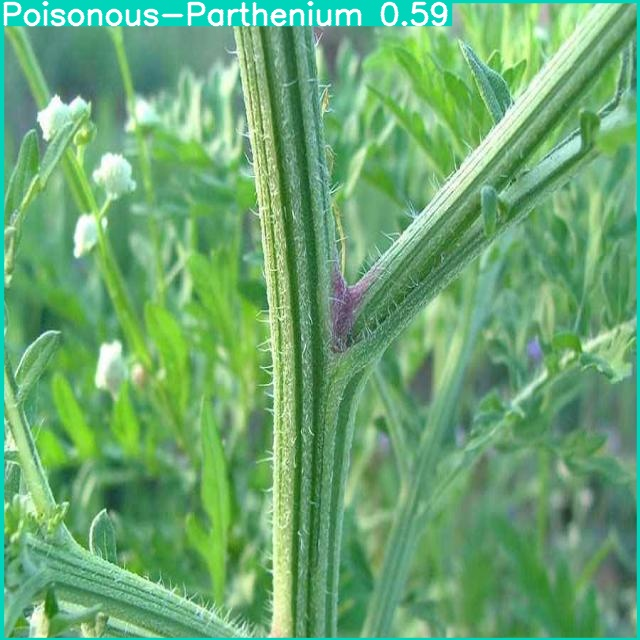

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_18_jpg.rf.cc9f282deb795fd8431bfdc0b9699087.jpg', width=600))

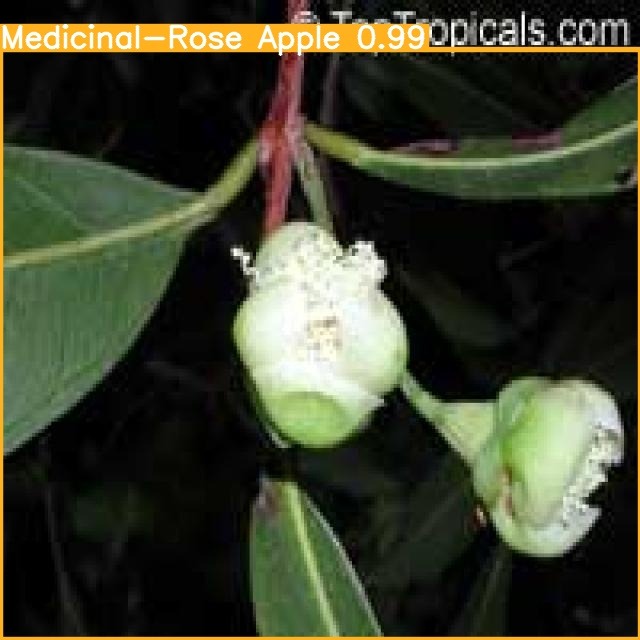

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_94_jpg.rf.a27726298d4bed28f72898a5fa1342fe.jpg', width=600))




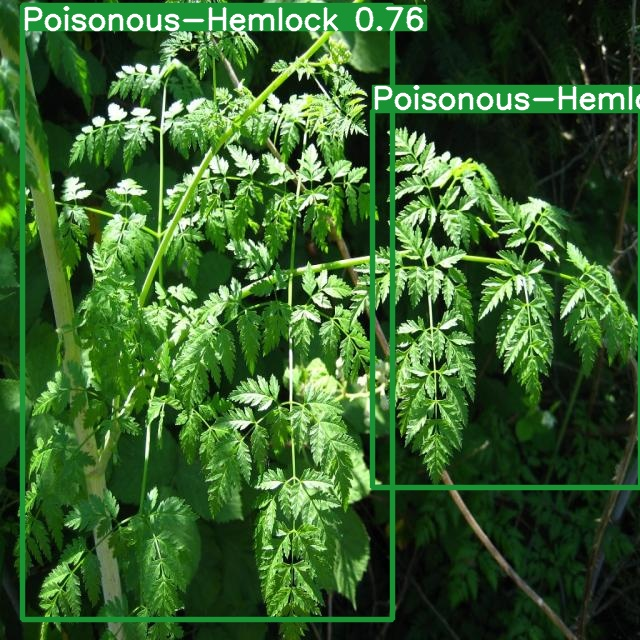

In [ ]:

display(Image(filename='/content/runs/detect/predict/Image_7_jpg.rf.bac07938cc6afbf64fa7fb8fdaa5094a.jpg', width=600))



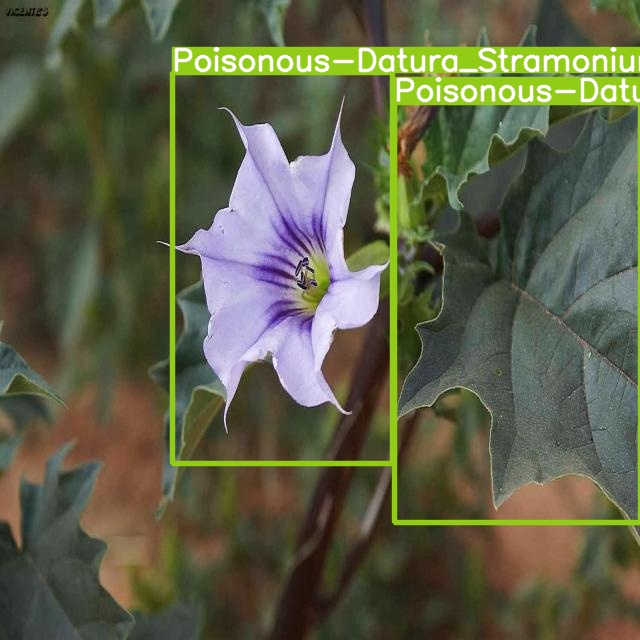

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_6_jpg.rf.199444c7c6fd6dc994aadf319735a157.jpg', width=600))



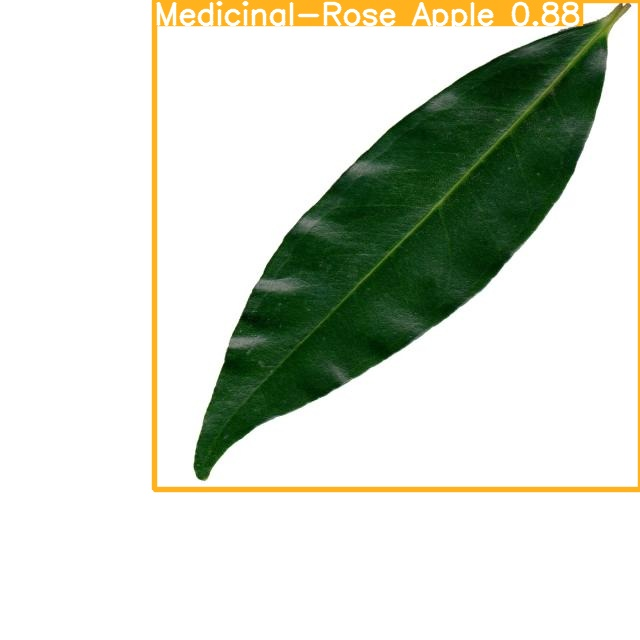

In [ ]:
display(Image(filename='/content/runs/detect/predict/SJ-S-015_jpg.rf.e4512af577fc70dd61ef94366c44c091.jpg', width=600))


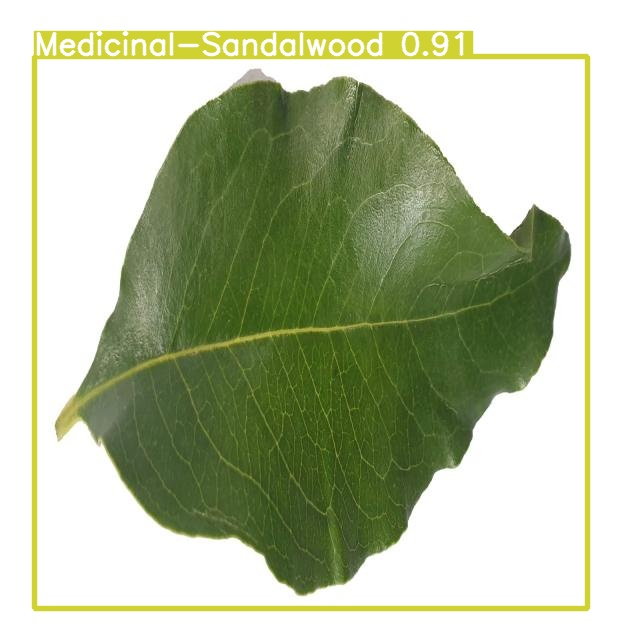

In [ ]:
display(Image(filename='/content/runs/detect/predict/SA-S-032_jpg.rf.b5a34b5eb3e6c40d8724dea2f381efcc.jpg', width=600))


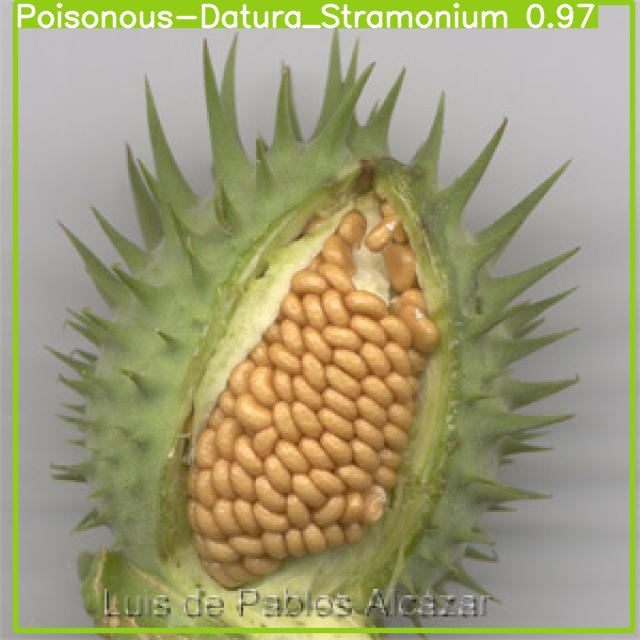

In [ ]:
display(Image(filename='/content/runs/detect/predict/Image_115_jpg.rf.87622059ffe52b6f6dc75ba101977002.jpg', width=600))

In [ ]:
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")